In [ ]:
### Install required modules
!pip install "stable-baselines3[extra]>=2.0.0a4"
!pip install gymnasium[atari]
!pip install gymnasium[accept-rom-license]
!pip install tensorboard

In [3]:
### Mount google drive
from google.colab import drive
drive.mount('/content/drive')

#%cd /content/drive/MyDrive/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
### Import modules
import gymnasium
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.evaluation import evaluate_policy

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/usr/local/lib/python3.10/dist-packages/jaxlib/xla_client.py:225: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  float8_e4m3b11fnuz = ml_dtypes.float8_e4m3b11


In [5]:
### Create environment
env = make_atari_env('MsPacman-v4', seed=0)

In [6]:
### Train and evaluate model
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log = 'pacman_train_log')
model.learn(total_timesteps=20)
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100, warn=False)

print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

Using cpu device
Wrapping the env in a VecTransposeImage.
Logging to pacman_train_log/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 729      |
|    ep_rew_mean     | 456      |
| time/              |          |
|    fps             | 233      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
mean_reward: 537.40 +/- 509.25


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


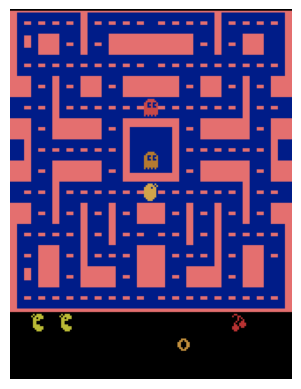

In [7]:
### We can do some visualisations which is cool!
plt.imshow(env.render('rgb_array'))
plt.axis('off')
plt.show()

In [ ]:
### Need to get tensorboard to work in Colab :'(
%load_ext tensorboard
%tensorboard --logdir '/content/drive/MyDrive/data/pacman_train_log'

Now looking into the Deep Q network:

In [11]:
import gym
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.atari_wrappers import AtariWrapper
from stable_baselines3.common.vec_env import VecFrameStack

In [19]:
env = make_atari_env('MsPacman-v4', seed=0)

#env = gym.make("MsPacman-v4")



DQNmodel = DQN('MlpPolicy', env, verbose=1, tensorboard_log = 'deeprl_lab_log')
DQNmodel.learn(total_timesteps=100000)

Using cpu device
Wrapping the env in a VecTransposeImage.
Logging to deeprl_lab_log/DQN_4


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:229: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 14.13GB > 11.46GB
  warnings.warn(


Streaming output truncated to the last 5000 lines.
| rollout/            |          |
|    ep_len_mean      | 678      |
|    ep_rew_mean      | 370      |
|    exploration_rate | 0.586    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 426      |
|    time_elapsed     | 10       |
|    total_timesteps  | 4362     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 676      |
|    ep_rew_mean      | 370      |
|    exploration_rate | 0.566    |
| time/               |          |
|    episodes         | 84       |
|    fps              | 427      |
|    time_elapsed     | 10       |
|    total_timesteps  | 4567     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 675      |
|    ep_rew_mean      | 367      |
|    exploration_rate | 0.547    |
| time/               |          |
|   

Looking at the mean reward of this policy:


In [20]:
mean_reward, std_reward = evaluate_policy(DQNmodel, env, n_eval_episodes=100, warn=False)

print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward: 792.20 +/- 274.68


The mean reward is higher than the PPO. This could be due to doing more iterations(here we did 100000 time steps, whereasin in the PPO we did 20 time steps).

In [26]:
# Saving the results of the first DQN network so that i dont have to re run everything again:
DQNmodel.save('/content/drive/My Drive/dqn_mspacman_model')

In [28]:
# Save the results to a file
with open("/content/drive/My Drive/results_DQN_1.txt", "w") as file:
    file.write(f"Mean reward: {mean_reward} +/- {std_reward}\n")

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


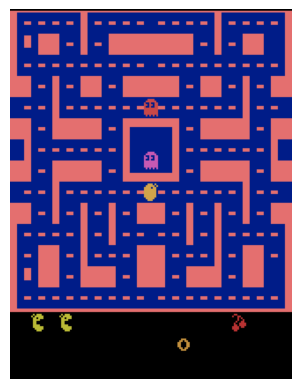

In [29]:
plt.imshow(env.render('rgb_array'))
plt.axis('off')
plt.show()

### NOTE TO ME: I need to work on how to produce some videos on how the packman performs ######

In [37]:
#!pip install pyvirtualdisplay
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from pathlib import Path
from base64 import b64encode
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from IPython import display as ipythondisplay
from IPython.display import HTML
from base64 import b64encode
import os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now i will try to iterate though different parameters (e.g different learning rates or different policies or different buffer sizes) and asses their performances on the DQN:
